In [1]:
import os
import json
import csv
from numpy import genfromtxt
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import math

In [129]:
# CSV dataset for playlists and artists - converted into an array
final_data = pd.read_csv("processed_genre_dataset.csv")
final_data = np.asarray(final_data)
# CSV dataset for the largest cluster
cluster_data = pd.read_csv("biggest_cluster_simple.csv")

In [131]:
# Creates a list of all artists in a playlist
final_playlists = []
known_playlists = [final_data[0][1]]
temp = []
for data in final_data:
    if data[1] not in known_playlists:
        known_playlists.append(data[1])
        final_playlists.append(temp)
        temp = []
    temp.append(data)

In [132]:
def Convert(string):
    """Convert a string into a list.
    Also removes the characters '[' , ']'
    """
    string = string.replace('[', '').replace(']', '').replace("'", '')
    li = list(string.split(", "))
    return li

In [133]:
# Creates json containing all values descriping an artist, such as genre, acoustics, etc...
complete_playlist = {}
for playlist in final_playlists:
    artists = []
    genres = []
    acoustics = []
    dancability = []
    duration = []
    energy = []
    instrumentalness = []
    liveliness = []
    loudness = []
    speechiness = []
    tempo = []
    valence = []
    popularity = []
    artist = []
    
    for song in playlist:
        artists += Convert(song[4])
        genres += Convert(song[5])
        acoustics.append(song[6])
        dancability.append(song[7])
        duration.append(song[8])
        energy.append(song[9])
        instrumentalness.append(song[10])
        liveliness.append(song[11])
        loudness.append(song[12])
        speechiness.append(song[13])
        tempo.append(song[14])
        valence.append(song[15])
        popularity.append(song[15])
        
    complete_playlist[song[1]] = {}
    complete_playlist[song[1]]['artists'] = artists
    complete_playlist[song[1]]['genres'] = genres
    complete_playlist[song[1]]['acoustics'] = acoustics
    complete_playlist[song[1]]['dancability'] = dancability
    complete_playlist[song[1]]['duration'] = duration
    complete_playlist[song[1]]['energy'] = energy
    complete_playlist[song[1]]['instrumentalness'] = instrumentalness
    complete_playlist[song[1]]['liveliness'] = liveliness
    complete_playlist[song[1]]['loudness'] = loudness
    complete_playlist[song[1]]['speechiness'] = speechiness
    complete_playlist[song[1]]['tempo'] = tempo
    complete_playlist[song[1]]['valence'] = valence
    complete_playlist[song[1]]['popularity'] = popularity

In [134]:
# Creates json of data in the largest cluster
biggest_cluster = {}

for key in list(complete_playlist["That's What I Like"].keys()):
    errors = 0
    temp = []
    for playlist in list(cluster_data.playlist_name):
        try:
            temp += complete_playlist[playlist][key]
        except:
            errors += 1
    biggest_cluster[key] = temp
print(errors)

2752


In [151]:
# Creates json of the top 5 most followed playlists
most_popular_list = ["That's What I Like", "Jack's Playlist", 'FARRUKO', 'FEELS', 'Workout Playlist']

most_popular = {}
for key in list(complete_playlist["That's What I Like"].keys()):
    temp = []
    for playlist in most_popular_list:
        temp += complete_playlist[playlist][key]
    most_popular[key] = temp

In [135]:
# Since largest cluster contains unfiltered data, these are 
# different measures on how much data there is after filtering
print('size of cluster = ', len(cluster_data.playlist_name))
print('number of non overlap between cluster and filtered playlists = ', errors)
print('this is the cluster size assuming filters = ', len(cluster_data.playlist_name) - errors)
print('number of playlists assuming filters = ', len(complete_playlist))

size of cluster =  3759
number of non overlap between cluster and filtered playlists =  2752
this is the cluster size assuming filters =  1007
number of playlists assuming filters =  5156


In [179]:
def plotHist(x_num,y_num,keys_list):
    """Plots histograms of height x_num and width y_num.
    Data shown is determined by keys_list containing a list of 
    keys in the json of playlist data.
    
    Shows 3 histograms per key: 
    - 1 of ALL songs in dataset 
    - 1 of the largest cluster
    - 1 of the top 5 most followed playlists
    """
    figure, axis = plt.subplots(x_num, y_num)
    plt.figure(figsize=(10,20))
    figure.tight_layout(pad=4.0)
    x = 0
    y = 0
    font_size = 7
    for targets in keys_list:
        all_targets = []
        for playlist_name in complete_playlist:
            all_targets += complete_playlist[playlist_name][targets] 

        axis[math.floor(x*2/x_num), y%y_num].hist(all_targets, edgecolor="red", bins=10)
        axis[math.floor(x*2/x_num), y%y_num].set_title(targets + ' score all playlists',
          fontsize = font_size)
        if targets == 'duration':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [ms]',
          fontsize = font_size)
        elif targets == 'tempo':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [BPM]',
          fontsize = font_size)
        elif targets == 'loudness':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [DB]',
          fontsize = font_size)
        else:
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets,
          fontsize = font_size)
        axis[math.floor(x*2/x_num), y%y_num].set_ylabel('count #')

        y += 1

        axis[math.floor(x*2/x_num), y%y_num].hist(biggest_cluster[targets], edgecolor="red", bins=10)
        axis[math.floor(x*2/x_num), y%y_num].set_title(targets + ' score in biggest cluster',
          fontsize = font_size)
        if targets == 'duration':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [ms]',
          fontsize = font_size)
        elif targets == 'tempo':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [BPM]',
          fontsize = font_size)
        elif targets == 'loudness':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [DB]',
          fontsize = font_size)
        else:
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets,
          fontsize = font_size)
        axis[math.floor(x*2/x_num), y%y_num].set_ylabel('count #')

        y += 1
        
        axis[math.floor(x*2/x_num), y%y_num].hist(most_popular[targets], edgecolor="red", bins=10)
        axis[math.floor(x*2/x_num), y%y_num].set_title(targets + ' score in most popular playlists',
          fontsize = font_size)
        if targets == 'duration':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [ms]',
          fontsize = font_size)
        elif targets == 'tempo':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [BPM]',
          fontsize = font_size)
        elif targets == 'loudness':
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets + ' [DB]',
          fontsize = font_size)
        else:
            axis[math.floor(x*2/x_num), y%y_num].set_xlabel(targets,
          fontsize = font_size)
        axis[math.floor(x*2/x_num), y%y_num].set_ylabel('count #')

        y += 1
        x += 1
        
    plt.show() 

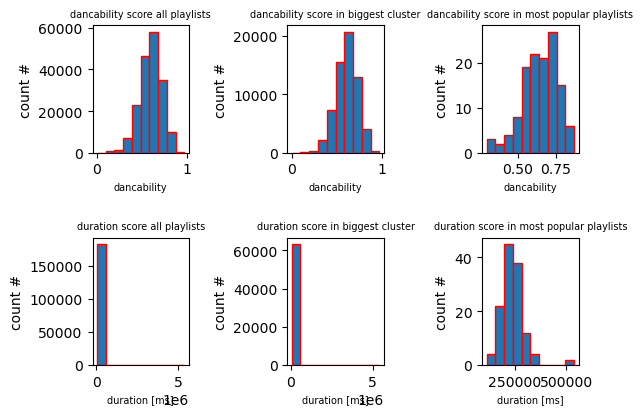

<Figure size 1000x2000 with 0 Axes>

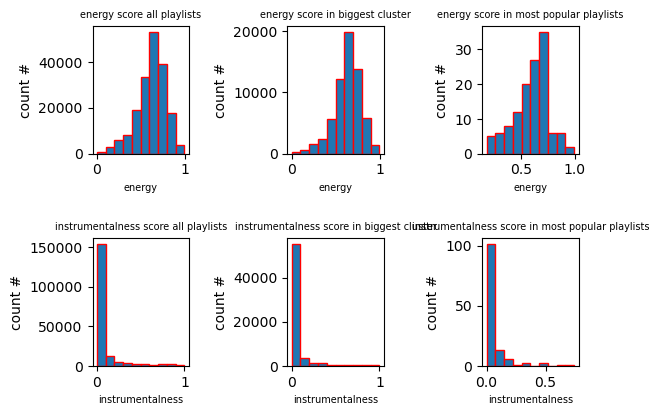

<Figure size 1000x2000 with 0 Axes>

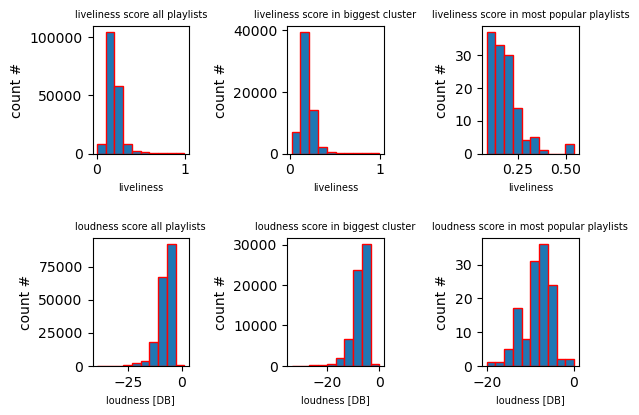

<Figure size 1000x2000 with 0 Axes>

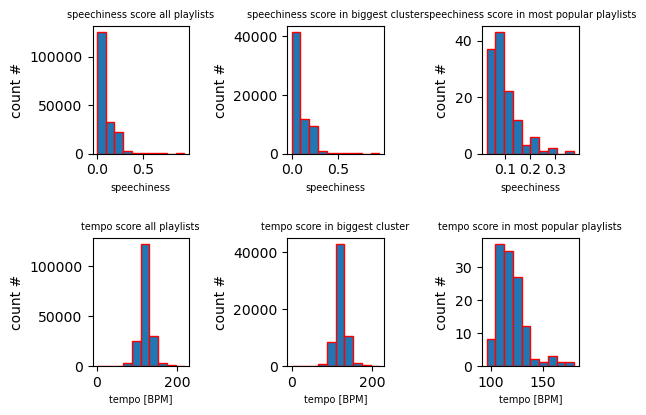

<Figure size 1000x2000 with 0 Axes>

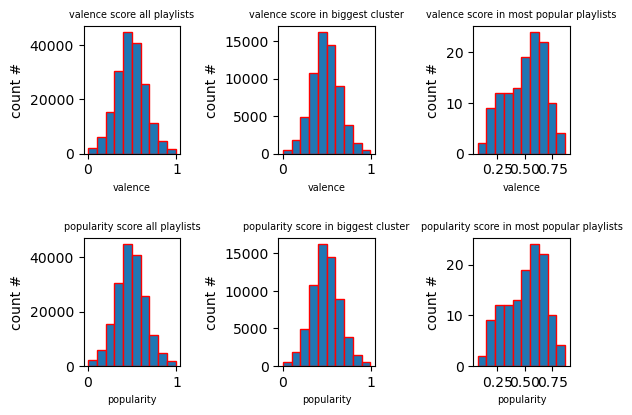

<Figure size 1000x2000 with 0 Axes>

In [180]:
# Plots relevant histograms into subfigures
all_keys = list(complete_playlist["That's What I Like"].keys())
plotHist(2,3,all_keys[3:5])
plotHist(2,3,all_keys[5:7])
plotHist(2,3,all_keys[7:9])
plotHist(2,3,all_keys[9:11])
plotHist(2,3,all_keys[11:13])

In [138]:
def generate_wordcloud(genre_list):
    """Generates a wordcloud based on a list of strings in the style of a Spotify logo.
    """
    # Visualizes a wordcloud of genres and how commonly they occur in all the playlists.
    unique_string=(" ").join(genre_list)
    mask = np.array(Image.open(r'Spotify_logo_without_text.png'))
    wc = WordCloud(mask = mask, background_color = "white",
                   random_state = 2, width = mask.shape[1],
                   height = mask.shape[0])
    # lower max_font_size, change the maximum number of word and lighten the background:
    wc.generate(unique_string)
    plt.imshow(wc, interpolation="None")
    plt.axis('off')
    plt.show()

In [143]:
#Makes arrays on genres in all playlists
all_genres = []
for playlist_name in complete_playlist:
    all_genres += complete_playlist[playlist_name]['genres'] 

#Makes arrays on artists in all playlists
all_artists = []
for playlist_name in complete_playlist:
    all_artists += complete_playlist[playlist_name]['artists'] 

#Makes arrays on genres in largest cluster
popular_genres = []
for playlist_name in most_popular:
    popular_genres += complete_playlist[playlist_name]['genres'] 
    
#Makes arrays on genres in largest cluster
popular_artists = []
for playlist_name in most_popular:
    popular_artists += complete_playlist[playlist_name]['artists'] 

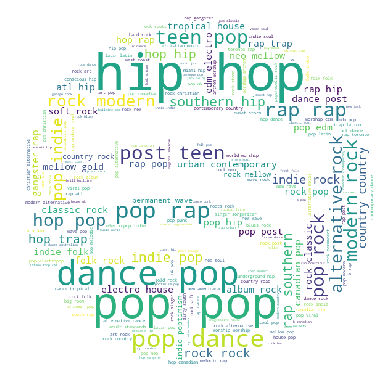

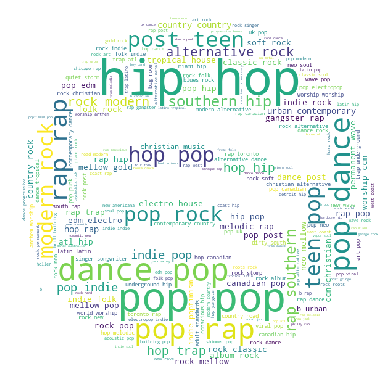

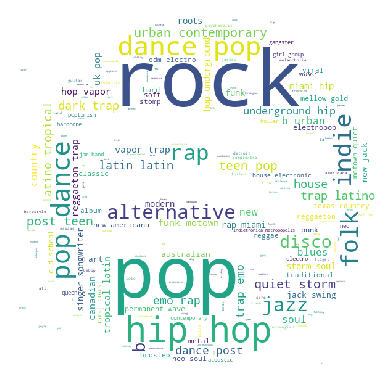

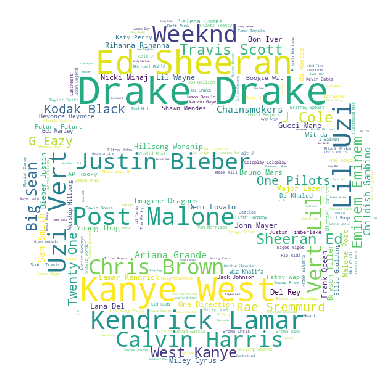

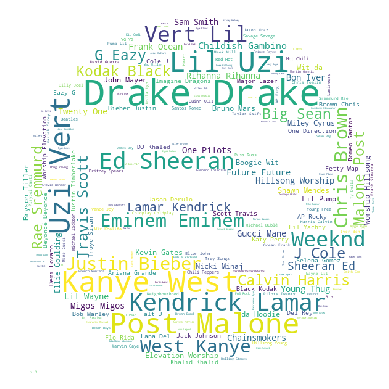

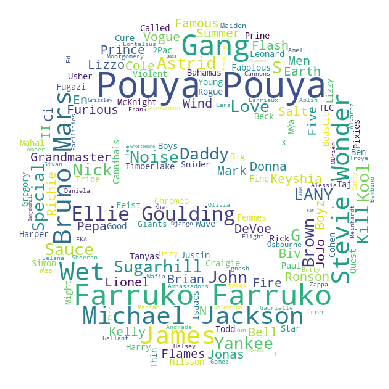

In [144]:
# Generates the word-clouds
generate_wordcloud(all_genres)
generate_wordcloud(biggest_cluster['genres'])
generate_wordcloud(popular_genres)
generate_wordcloud(all_artists)
generate_wordcloud(biggest_cluster['artists'])
generate_wordcloud(popular_artists)